In [3]:
nb_bench = 5
col_name = ['func', 'start', 'end', 'filename', 'worker', 'thread', 'process']

In [47]:
from math import sqrt
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(exp_type, exp_names, xlabel, xticks_label, plot_title):
    # Path to result file
    spark_file = '../{0}/data-{1}/results-spark_{0}-{2}.csv'
    dask_bag_file = '../{0}/data-{1}/results-dask-bag_{0}-{2}.csv'
    dask_delayed_file = '../{0}/data-{1}/results-dask-delayed_{0}-{2}.csv'
    dask_futures_file = '../{0}/data-{1}/results-dask-futures_{0}-{2}.csv'

    # Retrieve file name
    spark = [[pd.read_csv(spark_file.format(exp_type, nth_bench, exp_name), names=col_name).end.max()
            for nth_bench in range(1, nb_bench+1)
                if os.path.exists(spark_file.format(exp_type, nth_bench, exp_name))] 
        for exp_name in exp_names]

    dask_bag = [[pd.read_csv(dask_bag_file.format(exp_type, nth_bench, exp_name), names=col_name).end.max()
            for nth_bench in range(1, nb_bench+1)
                if os.path.exists(dask_bag_file.format(exp_type, nth_bench, exp_name))] 
        for exp_name in exp_names]

    dask_delayed = [[pd.read_csv(dask_delayed_file.format(exp_type, nth_bench, exp_name), names=col_name).end.max()
            for nth_bench in range(1, nb_bench+1)
                if os.path.exists(dask_delayed_file.format(exp_type, nth_bench, exp_name))]
        for exp_name in exp_names]

    dask_futures = [[pd.read_csv(dask_futures_file.format(exp_type, nth_bench, exp_name), names=col_name).end.max()
            for nth_bench in range(1, nb_bench+1)
                if os.path.exists(dask_futures_file.format(exp_type, nth_bench, exp_name))]
        for exp_name in exp_names]

    # Calculate statistics
    spark_stat = {'mean': list(map(np.mean, spark)), 'std': list(map(np.std, spark))}
    dask_bag_stat = {'mean': list(map(np.mean, dask_bag)), 'std': list(map(np.std, dask_bag))}
    dask_delayed_stat = {'mean': list(map(np.mean, dask_delayed)), 'std': list(map(np.std, dask_delayed))}
    dask_futures_stat = {'mean': list(map(np.mean, dask_futures)), 'std': list(map(np.std, dask_futures))}

    # Generate plot
    fig,ax=plt.subplots(figsize=(10,5))

    barWidth = 0.15

    # Set position of bar on X axis
    r1 = np.arange(len(spark))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    plt.bar(r1, spark_stat['mean'], yerr=spark_stat['std'], color='blue', width=barWidth, edgecolor='black', label='spark')
    plt.bar(r2, dask_bag_stat['mean'], yerr=dask_bag_stat['std'], color='crimson', width=barWidth, edgecolor='black', label='dask_bag')
    plt.bar(r3, dask_delayed_stat['mean'], yerr=dask_delayed_stat['std'], color='orange', width=barWidth, edgecolor='black', label='dask_delayed')
    plt.bar(r4, dask_futures_stat['mean'], yerr=dask_futures_stat['std'], color='purple', width=barWidth, edgecolor='black', label='dask_futures')

    # Add xticks on the middle of the group bars
    plt.xlabel(xlabel, fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(spark))], xticks_label)
    plt.ylabel('Makespan')

    plt.title(plot_title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.02))
    plt.show()

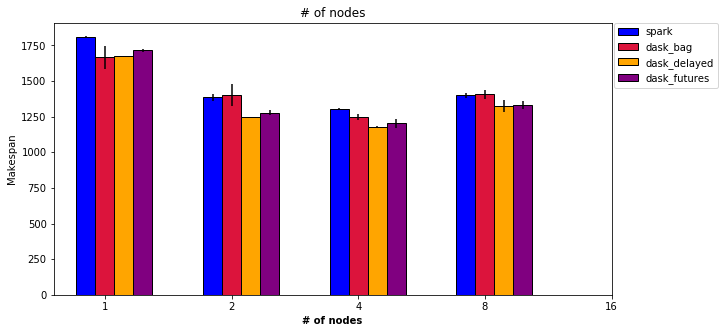

In [48]:
exp_type = 'inc'
exp_names = ['1node', '2node', '4node', 'baseline', '16node']
xlabel = '# of nodes'
xticks_label = ['1', '2', '4', '8', '16']
plot_title = '# of nodes'

plot_results(exp_type, exp_names, xlabel, xticks_label, plot_title)

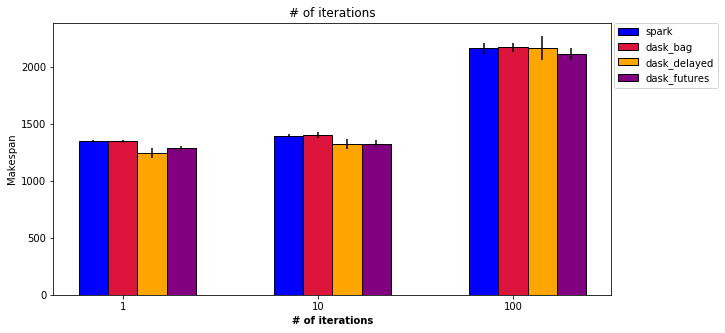

In [49]:
exp_type = 'inc'
exp_names = ['1itr', 'baseline', '100itr']
xlabel = '# of iterations'
xticks_label = ['1', '10', '100']
plot_title = '# of iterations'

plot_results(exp_type, exp_names, xlabel, xticks_label, plot_title)

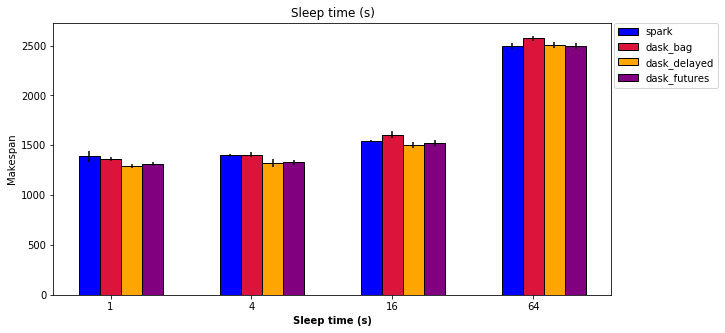

In [50]:
exp_type = 'inc'
exp_names = ['1delay', 'baseline', '16delay', '64delay']
xlabel = 'Sleep time (s)'
xticks_label = ['1', '4', '16', '64']
plot_title = 'Sleep time (s)'

plot_results(exp_type, exp_names, xlabel, xticks_label, plot_title)

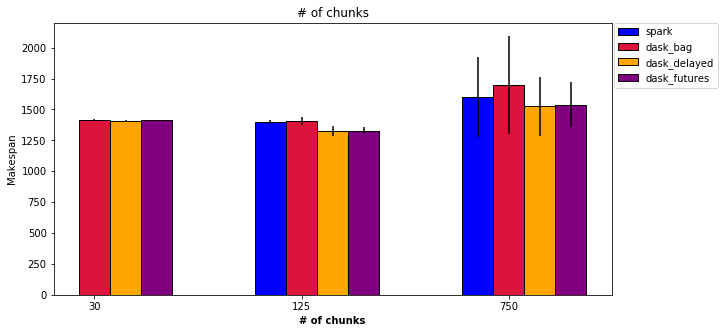

In [51]:
exp_type = 'inc'
exp_names = ['30chunks', 'baseline', '750chunks']
xlabel = '# of chunks'
xticks_label = ['30', '125', '750']
plot_title = '# of chunks'

plot_results(exp_type, exp_names, xlabel, xticks_label, plot_title)